# SciKit Learn

The [sklearn package](https://scikit-learn.org/stable/) provides a broad collection of data analysis and machine learning tools:
   - cover the whole process, data manipulation, fitting models, evaluating the results
   - Sklearn is based on **numpy**: data and results as numpy arrays.  

Classes and functions are provided in an high-level API:
   - allows application without requiring (too much) knowledge about the algorithm itself
   - API allows to use the same syntax for very different algorithms

Basic syntax for creating a model:

- instantiate the respective (algorithm's) object with hyper parameters and options

- fit the data using this object's built-in methods

- evaluate the model or use the model for prediction 


Note: we import classes specifically from the `scikit-learn` package instead of importing the package as a whole 

## Regression

### Linear Regression

- in LR, we model the the influence of some independent numerical variables on the value of a dependent numerical variable (the target). 

- widely used in economics

The ordinary least squares (OLS) regression is found in module `linear_model` as the `LinearRegression` class.

NOTE: by default, sklearn will fit an intercept. To exclude the intercept, set `fit_intercept=False` when instantiating the `LinearRegression()` object.

To demonstrate the procedure, we will use a [health insurance data set](https://www.kaggle.com/mirichoi0218/insurance/version/1#) trying to explain the insurance charges.

The data includes some categorical variables, for which we need to create dummy variables

- intercept
y = $\alpha$ + $\beta$ $\cdot$ x 

- no intercept
y = $\beta$ $\cdot$ x 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/insurance.csv")
#df = df.select_dtypes(include=['int64', 'float64'])
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


- transform the pandas Series for independent and dependent variable to a numpy array, which we reshape to 2D

- instantiate the object (default option `fit_intercept=True` included for illustrative reasons)

- call the `.fit()` method with positional arguments: first the independent variable(s) X, then target y

After the fit, we can access the parameters: intercept and coefficient(s). Again, the syntax is similar as above for the StandardScaler.

In this example, we regress the charges for a policy on the age of the customer.  

In [2]:
from sklearn.linear_model import LinearRegression

X = np.array(df.age).reshape(-1,1)
y = np.array(df.charges).reshape(-1,1)

linreg = LinearRegression(fit_intercept=True)
linreg.fit(X,y)

print(f"intercept: {linreg.intercept_}, coefficient: {linreg.coef_}")

intercept: [3165.88500606], coefficient: [[257.72261867]]


In [3]:
linreg.coef_

array([[257.72261867]])

What we find is a positive slope, `linreg.coef_` > 0, meaning that a higher bmi results in higher charges. To be precise, if your bmi increases by one unit, you will, on average, be charged about 394 more units.

We can also see that the estimated parameters are returned as (nested) arrays. To get to the values, we must hence extract them accordingly.

In [4]:
print(f"intercept: {linreg.intercept_[0]}, coefficient: {linreg.coef_[0][0]}")

intercept: 3165.8850060630284, coefficient: 257.72261866689547


Now, we can generate fitted values and plot these together with the data to get a visualisation of the regression results

To do so, we pass the `X` values to the `.predict()` method and save the result as `y_pred`. 

We then use matplotlib to create a scatter plot of the data and add a line plot of the regression line.

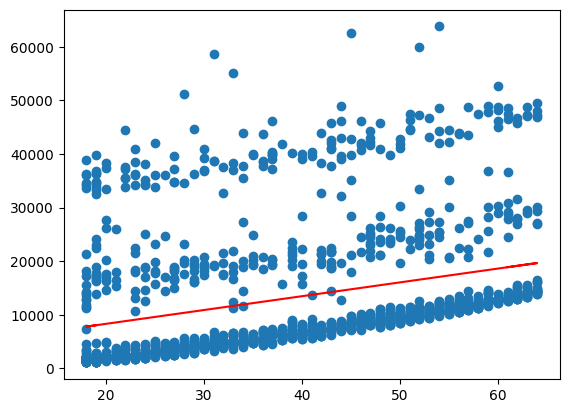

In [5]:
import matplotlib.pyplot as plt
y_pred = linreg.predict(X)

plt.scatter(X, y)
plt.plot(X,y_pred, color='red')
plt.show()

In the case above, we used the data "seen" for prediction. We can easily extrapolate this to unseen data, by simply predicting for a larger value range.

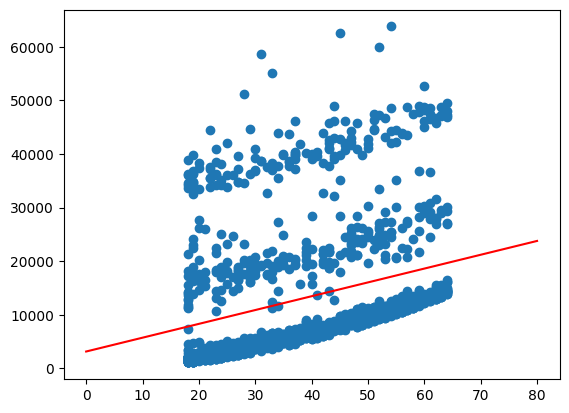

In [6]:
x_plot = np.linspace(0,80).reshape(-1,1)
y_extrapol = linreg.predict(x_plot)

plt.scatter(X, y)
plt.plot(x_plot,y_extrapol, color='red')
plt.show()

### Digression: statsmodels

At this point, we shortly discuss an important point when it comes to regression: significance.

We skipped this above, because sklearn has its shortcomings when it comes to this kind of 'classical statistics'. The calculation of p-values for example is not included and would have to be implemented by oneself.

For such statistics, we can switch to the [statsmodels package](https://www.statsmodels.org/stable/index.html):
   - maybe a better choice for regression modelling because of detailed output

Below, an example is given for the regression from above.
The syntax is just slightly different:
   - we call `add_constant` on the data (!) to fit an intercept
   - we instantiate an `OLS` object, providign the data here, not in the subsequent
   - `fit` call
   - using `.summary()` automatically outputs a table of information about the model

- intercept
y = $\alpha$ + $\beta$ $\cdot$ x 

- no intercept
y = $\beta$ $\cdot$ x 

In [7]:
import statsmodels.api as sm

X = sm.add_constant(df.age)
y = df.charges

res = sm.OLS(y, X).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           4.89e-29
Time:                        19:02:33   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.0

$H_0$ : $\beta =0$

We can access the quantities from the table specifically, using the names listed when running `dir(res_smoker)`.

In [8]:
res.pvalues

const    7.506030e-04
age      4.886693e-29
dtype: float64

In [9]:
res.params

const    3165.885006
age       257.722619
dtype: float64

In [10]:
linreg.coef_

array([[257.72261867]])

In [11]:
linreg.intercept_

array([3165.88500606])

# Clustering

Clustering is unsupervised learning. Instead of knowing results that you want to model, like in linear regression, where the target variable has been observed, one lets the algorithm decide the outcome.

For our example of clustering, we want to assign data point to clusters, based on some characteristics. These could for example be the number of employees or the market cap. What the user needs to enter before, is the number of clusters to assign the data to. So, for an example of three clusters, companies of high market cap and many employees would possibly be in the same cluster. The other cluster might contain low market cap and relatively few employees. The third cluster then might just catch all mixed and not so extreme characteristics.

We can look at this with an example, that uses the k-means algorithm. The data below shows data points, that are characterised by two features: `x_1` and `x_2`
We try to find clusters, i.e., groups, in that data. Remeber that we are talking about unsupervised learning: a "true" number of groups does not exist, like a true, or observed, value exists in regression or classification tasks, which are from the realm of supervides learning. (In this toy example, actually, there is one: we crete data with a given number of centers). However, just from looking at the scatterplot below, we might already guess what number of clusters make sense.

<AxesSubplot: xlabel='x_1', ylabel='x_2'>

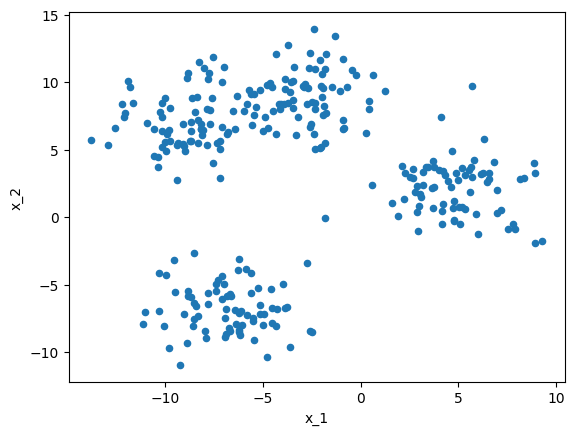

In [12]:
from sklearn.datasets import make_blobs

X, clusters = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42, cluster_std=2)
df = pd.DataFrame(X, columns=["x_1", "x_2"])
df.plot.scatter(x = "x_1", y = "x_2")

Without going into detail, we can use the k-means algorithm by the regular sklearn syntax: instantiate object, fit (and evaluate). In order to assess how many clusters might be justified, we can use the silhouette score. Broadly speaking, it calculates how the distances between points in one cluster compare to the distances to all points in the closest of all other clusters. We can use it to decide the number of cluster that could be appropriate by running k-means for an increasing number of clusters and each time calculating the silhouette score. We can choose that number of clusters, that achieves the highest silhouette score:

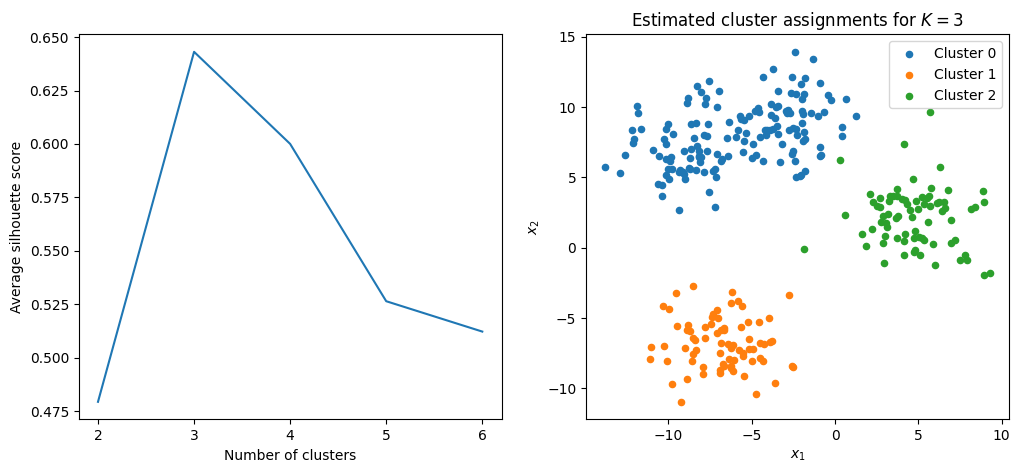

In [13]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pylab as plt

colors = ["#1f77b4", "#ff7f0e", "#2ca02c" , 'red']
X, clusters = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42, cluster_std=2)
df = pd.DataFrame(X, columns=["x_1", "x_2"])

scores = []
max_clusters = 7
for n_cluster in range(2, max_clusters): 
    kmeans = KMeans(n_clusters = n_cluster, n_init = "auto", random_state = 42)
    kmeans.fit(X)
    silhouette_scores = silhouette_samples(X, kmeans.labels_, metric = "euclidean")
    scores.append(silhouette_scores.mean())

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(scores)
axs[0].set_xticks([0, 1, 2, 3, 4], ["2", "3", "4", "5", "6"])
axs[0].set_xlabel("Number of clusters")
axs[0].set_ylabel("Average silhouette score")


kmeans = KMeans(n_clusters=3, n_init = "auto")
kmeans.fit(X)
df.loc[:, "cluster"] = kmeans.labels_
for i in range(3):
    df[df.cluster == i].plot.scatter(x = "x_1", y = "x_2", c = colors[i], ax = axs[1], label = f"Cluster {i}")
axs[1].set_xlabel(r"$x_1$")
axs[1].set_ylabel(r"$x_2$")
axs[1].set_title(r"Estimated cluster assignments for $K=3$")

plt.show()

Interestingly enough, the inital setting for our data was four centers. However, the silhouette score was the highest for just three clusters. The reason can be seen in the right plot: two of the created clusters are so close to each other, that it makes more sense (in terms of the silhouette score) to regard them as one.